In [35]:
using SparseArrays
using LinearAlgebra
using NLopt
using PyPlot
using KrylovKit
using FiniteDifferences
using Statistics
using Revise
using TopologyOptimizationHelper

In [52]:
function ring_resonator(X, inner, outer; resolution=20)
    # Get matrix dimensions
    N, M = size(X)
    
    # Compute the center of the matrix
    center_y = N÷2
    center_x = M÷2
    
    # Assign value to entries within the given radii
    for i in 1:M
        for j in 1:N
            # Calculate the distance from the center, considering the resolution
            square_dist = ((i - center_x) / res)^2 + ((j - center_y) / res)^2
            if inner^2 <= square_dist <= outer^2
                X[j, i] = 12
            end
        end
    end
    return X
end

ring_resonator (generic function with 1 method)

In [54]:
Lx = 5
Ly = 5
res = 20
ε = ring_resonator(ones(N,M), 1.258984375, 1.5; resolution=res)
ω = 2π
offset = -round(Int, res * (0.1 + 3/2))

N, M = size(ε)
b = zeros(N, M)
b[N÷2 + offset, M÷2] = 1;

In [58]:
LDOS_opt, ε_opt, LDOS_vals, omegas, x, y = LDOS_Optimize2d(Lx, Ly, ε, ω, b; resolution=res, ftol=0, max_eval=50, design_dimensions=(3.03,3.03))

numevals = opt.numevals = 50
ω₀_opt = 6.293782585109908 - 0.002492037524841622im
Q_opt = 1262.778453849707


(0.0019635941914203617, [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], [0.0002955231089506758, 0.00029553381524270126, 0.00029564098265862077, 0.00029720471000354833, 0.0003253887459319814, 0.00020334063878107514, 0.0003130093397071792, 0.00023314317724461105, 0.0003718642148542638, 0.000255918672156151  …  0.0005128643922147306, 0.0013123036168967985, 0.001530815534592452, 0.0003715193660979024, 0.0010483806098053542, 0.00045537709646569836, 9.327176357719378e-5, 0.0016583661003990433, 0.0014823685461373924, 0.0019635941914203617], ComplexF64[6.260137693507353 - 8.175207780221626e-5im, 6.260137626884956 - 8.175424677627775e-5im, 6.260136960914188 - 8.177600014946061e-5im, 6.260127421879328 - 8.210181334241647e-5im, 6.259999973688886 - 8.903903090487829e-5im, 6.259322309278542 - 0.00041718758866460736im, 6.259636652532749 - 0.0001905834269339823im, 6.259792161234003 - 0.00012838460743936874im, 6.259931295337809 - 9.79649218215954e-5im, 6.2612626186026

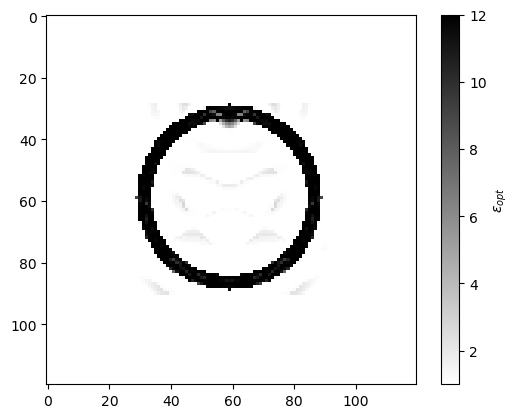

PyObject <matplotlib.colorbar.Colorbar object at 0x000002453D57B1F0>

In [59]:
imshow(ε_opt, cmap="gray_r", vmin=1, vmax=12)
colorbar(label=L"ε_{opt}")

In [60]:
log_LDOS_opt, log_ε_opt, log_LDOS_vals, log_omegas, x, y = log_LDOS_Optimize2d(Lx, Ly, ε_opt, ω, b, vec(b); resolution=res, ftol=1e-10, max_eval=5000, design_dimensions=(3.03,3.03))

numevals = opt.numevals = 5000
ω₀_opt = 6.290336231825284 - 6.047776514288914e-8im
Q_opt = 5.200536277227905e7


(4.152606435510643, [1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0], [-6.303833968514376, -6.303833918596929, -6.30383341942539, -6.303826256411953, -6.303724330754262, -6.302349585878347, -6.293844491158513, -6.28560099953501, -6.277319294516035, -6.2685809915960276  …  4.152358345229794, 4.152368526831564, 4.152460554047912, 4.110735236540173, 4.15223157324868, 4.152486981932847, 4.152491363569639, 4.1525235067329564, 4.152540117109897, 4.152606435510643], ComplexF64[6.293782585109908 - 0.002492037524841622im, 6.293782583932424 - 0.002492037488036747im, 6.293782572157598 - 0.0024920371199872245im, 6.293782404674706 - 0.002492031777468176im, 6.293780076062616 - 0.002491952785848671im, 6.293750066725259 - 0.0024908553247799388im, 6.29345973544794 - 0.002481508209298171im, 6.293121321444318 - 0.002471241135516839im, 6.292737325156527 - 0.0024606706066302953im, 6.292288257524231 - 0.0024501703799200965im  …  6.290335981471307 - 6.049505420382944e-8im, 6.2

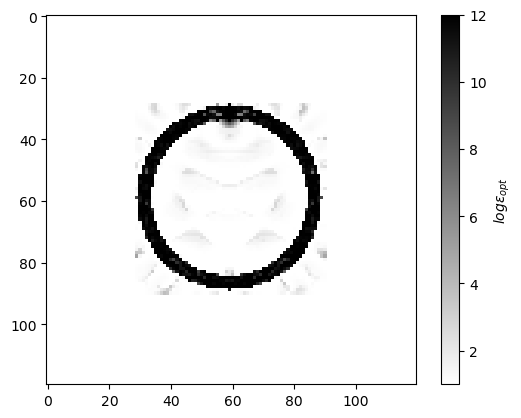

PyObject <matplotlib.colorbar.Colorbar object at 0x000002454CE197B0>

In [61]:
imshow(log_ε_opt, cmap="gray_r", vmin=1, vmax=12)
colorbar(label=L"logε_{opt}")

In [ ]:
mod_LDOS_opt, mod_ε_opt, mod_LDOS_vals, mod_omegas, x, y = mod_LDOS_Optimize2d(Lx, Ly, ε_opt, ω, b, vec(b); resolution=res, ftol=0, max_eval=5000, design_dimensions=(3.03,3.03))

In [ ]:
imshow(mod_ε_opt, cmap="gray_r", vmin=1, vmax=12)
colorbar(label=L"modε_{opt}")

In [ ]:
logQs = -real(log_omegas) ./ 2imag(log_omegas)
modQs = -real(mod_omegas) ./ 2imag(mod_omegas)

semilogy(logQs, color="blue")
semilogy(modQs, color="red")